# Load data

In [2]:
from utils import load_bts_data
df = load_bts_data(separate=False)
df

,YEAR,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_CITY_MARKET_ID,ORIGIN_CITY_NAME,ORIGIN_STATE_FIPS,ORIGIN_WAC,DEST_AIRPORT_ID,DEST_CITY_MARKET_ID,DEST_CITY_NAME,DEST_STATE_FIPS,DEST_WAC,CRS_DEP_TIME,ARR_DEL15,DISTANCE
0,2017,1,5,AA,N001AA,2571,11298,30194,"Dallas/Fort Worth, TX",48,74,14524,34524,"Richmond, VA",51,38,705,0.0,1158.0
1,2017,1,5,AA,N001AA,2603,14524,34524,"Richmond, VA",51,38,11298,30194,"Dallas/Fort Worth, TX",48,74,1145,0.0,1158.0
2,2017,1,5,AA,N001AA,386,11298,30194,"Dallas/Fort Worth, TX",48,74,12451,31136,"Jacksonville, FL",12,33,1510,0.0,918.0
3,2017,1,5,AA,N001AA,386,12451,31136,"Jacksonville, FL",12,33,11298,30194,"Dallas/Fort Worth, TX",48,74,1925,0.0,918.0
4,2017,1,5,AA,N002AA,2197,11042,30647,"Cleveland, OH",39,44,11298,30194,"Dallas/Fort Worth, TX",48,74,1125,0.0,1021.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1345612,2021,30,4,WN,N969WN,437,12954,32575,"Long Beach, CA",6,91,13796,32457,"Oakland, CA",6,91,1455,1.0,353.0
1345613,2021,30,4,WN,N969WN,437,13198,33198,"Kansas City, MO",29,64,10423,30423,"Austin, TX",48,74,1025,1.0,650.0
1345614,2021,30,4,WN,N969WN,438,13796,32457,"Oakland, CA",6,91,12954,32575,"Long Beach, CA",6,91,1655,1.0,353.0
1345615,2021,30,4,WN,N969WN,439,12954,32575,"Long Beach, CA",6,91,13796,32457,"Oakland, CA",6,91,1855,1.0,353.0


# Delayed flights by year

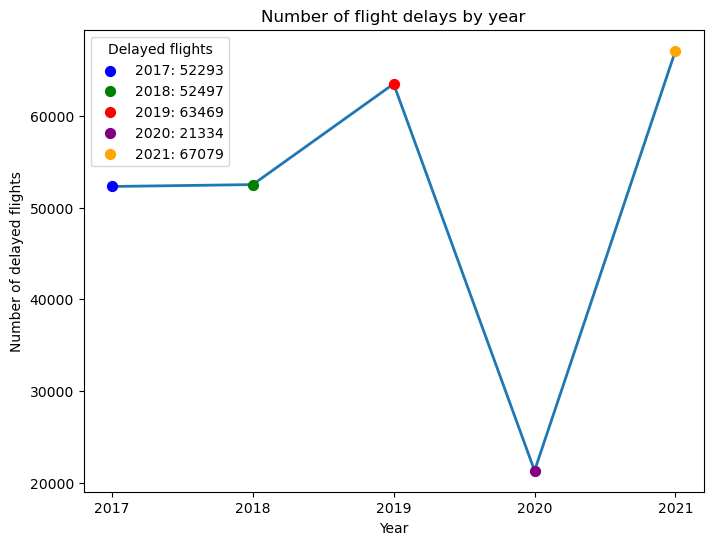

In [4]:
import matplotlib.pyplot as plt

# Group the data by YEAR and count the number of ARR_DEL15 == 1
grouped = df[df['ARR_DEL15'] == 1].groupby('YEAR').size().reset_index(name='counts')

# Create a line plot of the counts
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(grouped['YEAR'], grouped['counts'], linewidth=2)

# Add dots to the plot
colors = ['blue', 'green', 'red', 'purple', 'orange']
labels = ['{}: {}'.format(row['YEAR'], row['counts']) for i, row in grouped.iterrows()]
for i, row in grouped.iterrows():
    ax.scatter(row['YEAR'], row['counts'], color=colors[i], s=50, zorder=10, label=labels[i])

# Add a legend
ax.legend(title='Delayed flights', fontsize='medium')

# Set the x-axis and y-axis labels
ax.set_xlabel('Year')
ax.set_ylabel('Number of delayed flights')

# Set the x-tick labels and positions
x_ticks = [2017, 2018, 2019, 2020, 2021]
ax.set_xticks(x_ticks)
ax.set_xticklabels(x_ticks)

# Set the title of the plot
ax.set_title('Number of flight delays by year')

plt.show()

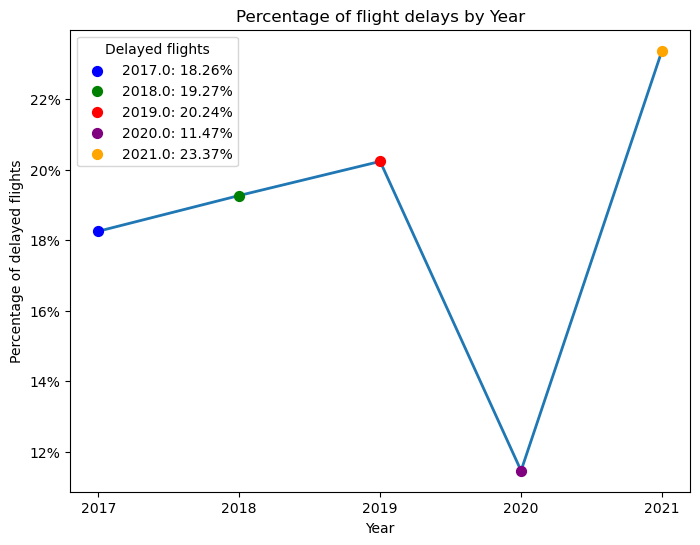

In [45]:
import matplotlib.ticker as mtick

# Group the data by YEAR and calculate the percentage of ARR_DEL15 == 1
grouped2 = df.groupby('YEAR')['ARR_DEL15'].agg(lambda x: (x == 1).sum() / len(x) * 100).reset_index(name='percentage')

# Create a line plot of the percentages
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(grouped2['YEAR'], grouped2['percentage'], linewidth=2)

# Add dots to the plot
colors = ['blue', 'green', 'red', 'purple', 'orange']
labels = ['{}: {:.2f}%'.format(row['YEAR'], row['percentage']) for i, row in grouped2.iterrows()]
for i, row in grouped2.iterrows():
    ax.scatter(row['YEAR'], row['percentage'], color=colors[i], s=50, zorder=10, label=labels[i])
ax.legend(title='Delayed flights', fontsize='medium')

# Set the x-axis and y-axis labels
ax.set_xlabel('Year')
ax.set_ylabel('Percentage of delayed flights')

# Set the y-axis tick labels as percentages
fmt = '%.0f%%'
yticks = mtick.FormatStrFormatter(fmt)
ax.yaxis.set_major_formatter(yticks)

# Set the x-tick labels and positions
x_ticks = [2017, 2018, 2019, 2020, 2021]
ax.set_xticks(x_ticks)
ax.set_xticklabels(x_ticks)

# Set the title of the plot
ax.set_title('Percentage of flight delays by Year')
plt.show()


# Delayed flights by airline

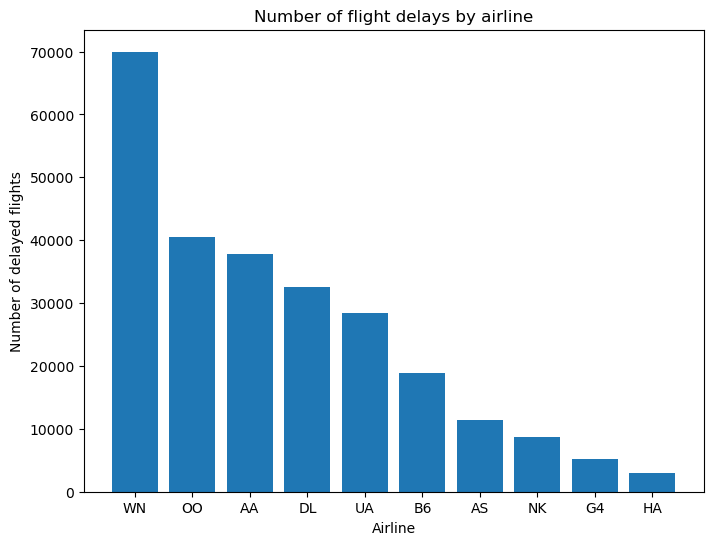

In [51]:
# Filter the DataFrame to include only rows where ARR_DEL15 is 1
df_filtered = df[df['ARR_DEL15'] == 1]

# Group the filtered DataFrame by OP_UNIQUE_CARRIER and count the occurrences
grouped = df_filtered.groupby('OP_UNIQUE_CARRIER').size().reset_index(name='counts')
# Sort the carriers by percentage of delayed flights
grouped = grouped.sort_values('counts', ascending=False)

# Create a bar plot of the counts
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(grouped['OP_UNIQUE_CARRIER'], grouped['counts'])

# Set the x-axis and y-axis labels
ax.set_xlabel('Airline')
ax.set_ylabel('Number of delayed flights')

# Set the title of the plot
ax.set_title('Number of flight delays by airline')

plt.show()

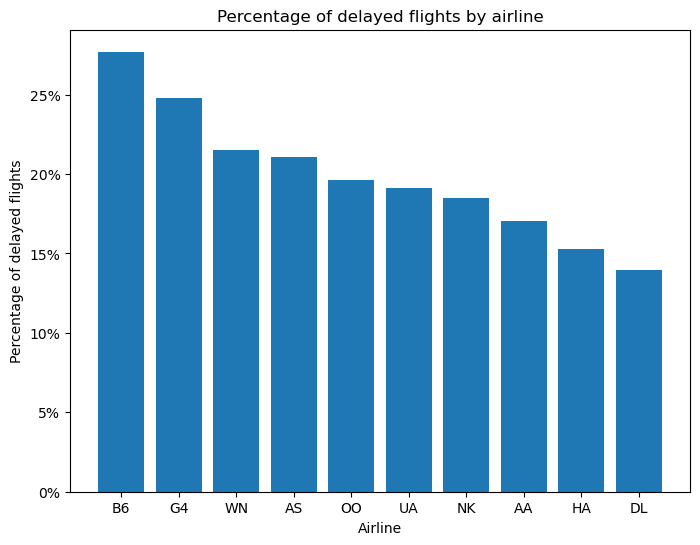

In [68]:
from matplotlib.ticker import FuncFormatter

# Define a function to format ticks as percentages
def percentage(x, pos):
    return '{:.0%}'.format(x)

# Calculate the percentage of delayed flights for each unique carrier
grouped = df.groupby('OP_UNIQUE_CARRIER')['ARR_DEL15'].mean().reset_index(name='percentage')

# Sort the carriers by percentage of delayed flights
grouped = grouped.sort_values('percentage', ascending=False)

# Create a bar plot of the percentage of delayed flights
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(grouped['OP_UNIQUE_CARRIER'], grouped['percentage'])

# Set the x- and y-axis labels and title
ax.set_xlabel('Airline')
ax.set_ylabel('Percentage of delayed flights')
ax.set_title('Percentage of delayed flights by airline')

# Format the y-axis ticks as percentages
formatter = FuncFormatter(percentage)
ax.yaxis.set_major_formatter(formatter)

plt.show()

# Correlation

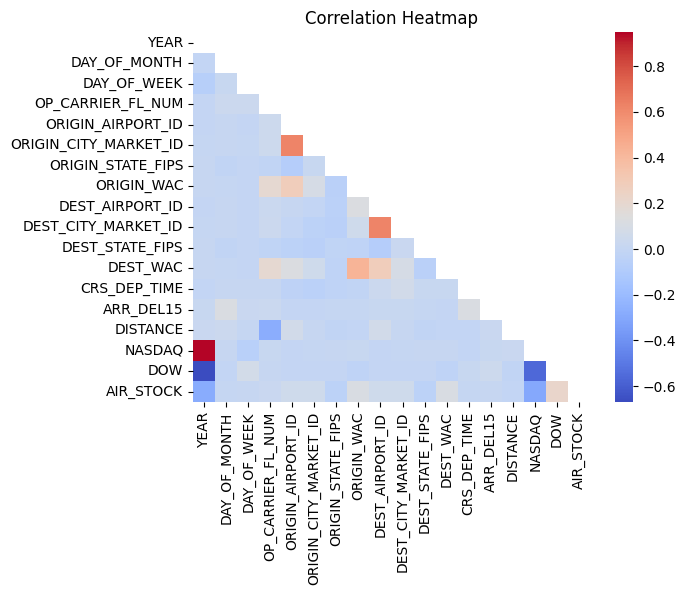

In [2]:
import seaborn as sns
import numpy as np
from utils import load_data
import matplotlib.pyplot as plt

df2=load_data(separate=False)

# Select the numerical columns in the DataFrame
num_cols = df2.select_dtypes(include=['float64', 'int64'])

# Create a correlation matrix
corr = num_cols.corr()

# Create a mask to plot only the upper triangle of the heatmap
mask = np.triu(np.ones_like(corr, dtype=bool))

# Create the heatmap
sns.heatmap(corr, mask=mask, cmap='coolwarm')

# Set the title of the plot
plt.title('Correlation Heatmap')

# Show the plot
plt.show()

# Delay by origin city

C:\Users\zhuqu\AppData\Local\Temp\ipykernel_16088\1132532607.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(top_cities['ORIGIN_CITY_NAME'], rotation=45, ha='right')


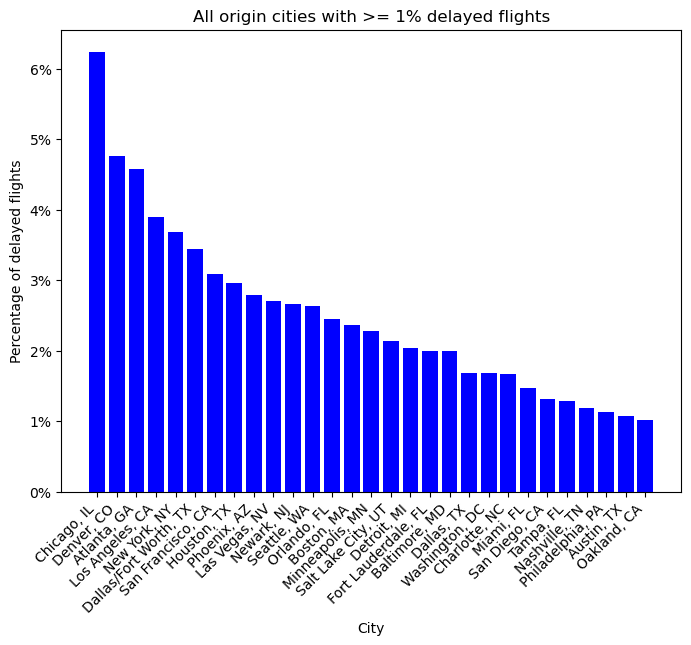

In [37]:
# Filter the data for delayed flights
df_delayed = df[df['ARR_DEL15'] == 1]

# Group the data by ORIGIN_CITY_NAME and count the number of flights in each city
grouped = df_delayed.groupby('ORIGIN_CITY_NAME').size().reset_index(name='count')

# Calculate the percentage of flights delayed for each city
grouped['percentage'] = grouped['count'] / len(df_delayed) * 100

# Sort the cities by the percentage of delayed flights in descending order
grouped = grouped.sort_values(by='percentage', ascending=False)
top_cities = grouped[grouped['percentage'] >= 1]

# Create a bar chart showing the percentage of delayed flights for each of the top 10 cities
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(top_cities['ORIGIN_CITY_NAME'], top_cities['percentage'], color='blue')

# Set the x-axis label and rotate the tick labels
ax.set_xlabel('City')
ax.set_xticklabels(top_cities['ORIGIN_CITY_NAME'], rotation=45, ha='right')

# Set the y-axis label and format the ticks as percentages
ax.set_ylabel('Percentage of delayed flights')
ax.yaxis.set_major_formatter('{x:.0f}%')

# Set the title of the plot
ax.set_title('All origin cities with >= 1% delayed flights')

plt.show()

# Delays by destination cities

C:\Users\zhuqu\AppData\Local\Temp\ipykernel_16088\957561120.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(top_cities['DEST_CITY_NAME'], rotation=45, ha='right')


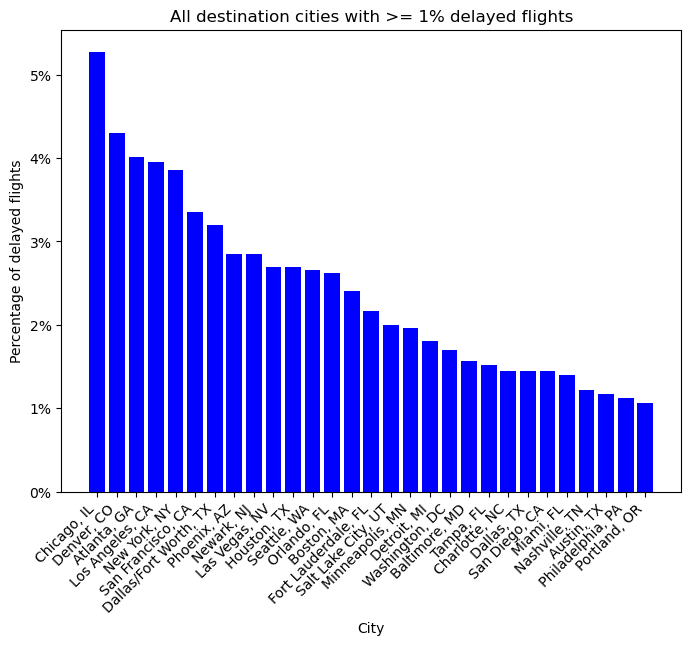

In [36]:
# Filter the data for delayed flights
df_delayed = df[df['ARR_DEL15'] == 1]

# Group the data by ORIGIN_CITY_NAME and count the number of flights in each city
grouped = df_delayed.groupby('DEST_CITY_NAME').size().reset_index(name='count')

# Calculate the percentage of flights delayed for each city
grouped['percentage'] = grouped['count'] / len(df_delayed) * 100

# Sort the cities by the percentage of delayed flights in descending order
grouped = grouped.sort_values(by='percentage', ascending=False)
top_cities = grouped[grouped['percentage'] >= 1]

# Create a bar chart showing the percentage of delayed flights for each of the top 10 cities
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(top_cities['DEST_CITY_NAME'], top_cities['percentage'], color='blue')

# Set the x-axis label and rotate the tick labels
ax.set_xlabel('City')
ax.set_xticklabels(top_cities['DEST_CITY_NAME'], rotation=45, ha='right')

# Set the y-axis label and format the ticks as percentages
ax.set_ylabel('Percentage of delayed flights')
ax.yaxis.set_major_formatter('{x:.0f}%')

# Set the title of the plot
ax.set_title('All destination cities with >= 1% delayed flights')

plt.show()

# Delays by hour

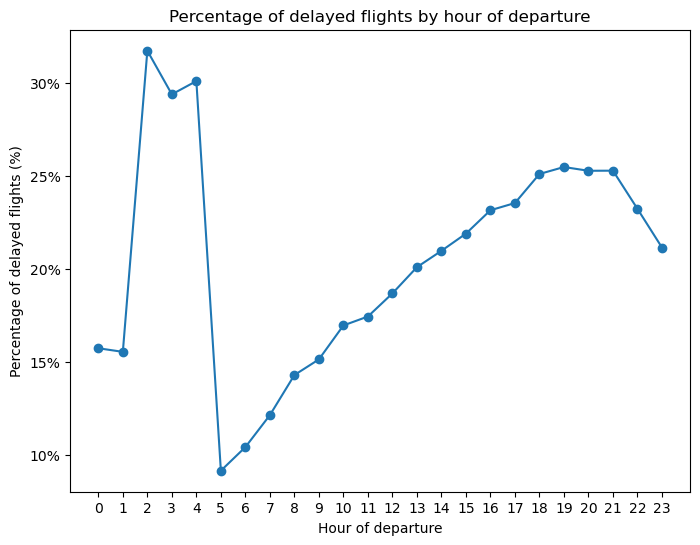

In [13]:
import pandas as pd
# Convert CRS_DEP_TIME to a string
df['CRS_DEP_TIME'] = df['CRS_DEP_TIME'].astype(str)

# Extract the hours and minutes
df['DEP_HOUR'] = df['CRS_DEP_TIME'].str[:-2].str.pad(width=2, fillchar='0')
df['DEP_MINUTE'] = df['CRS_DEP_TIME'].str[-2:].str.pad(width=2, fillchar='0')

# Convert the hours to integer
df['DEP_HOUR'] = df['DEP_HOUR'].astype(int)

# Group the data by the hour of departure and calculate the percentage of delayed flights
grouped = df.groupby('DEP_HOUR')['ARR_DEL15'].mean().reset_index(name='percentage')

# Create a line plot of the percentage of delayed flights
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(grouped['DEP_HOUR'], grouped['percentage']*100, marker='o')
ax.set_xlabel('Hour of departure')
ax.set_ylabel('Percentage of delayed flights (%)')
ax.set_title('Percentage of delayed flights by hour of departure')

# Set the x-axis ticks to show all 24 hours
ax.set_xticks(range(24))

# Set the y-axis ticks to show percentages
ax.yaxis.set_major_formatter('{x:.0f}%')

plt.show()

# Delay by distance

C:\Users\zhuqu\AppData\Local\Temp\ipykernel_16088\4169074796.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(grouped['DISTANCE_BINNED'], rotation=45, ha='right')


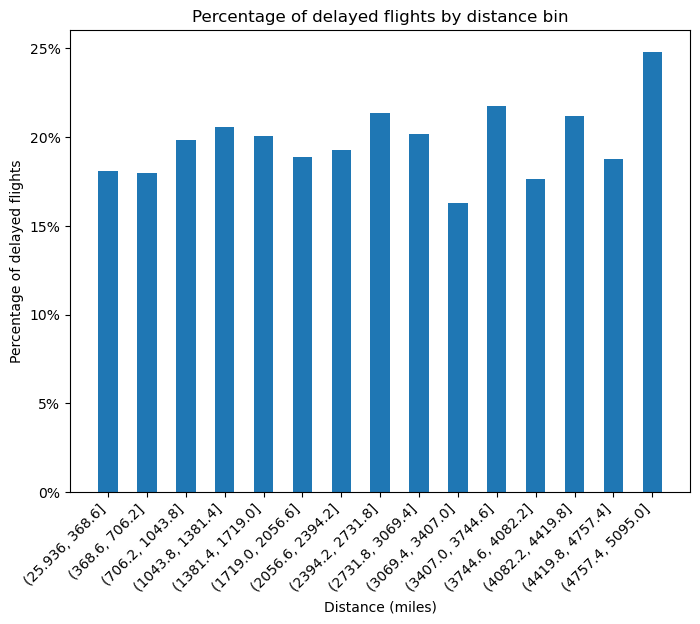

In [33]:

# Bin the distances into 15 equally-sized bins
df['DISTANCE_BINNED'] = pd.cut(df['DISTANCE'], bins=15)

# Calculate the percentage of delayed flights for each bin
grouped = df.groupby('DISTANCE_BINNED')['ARR_DEL15'].mean().reset_index(name='percentage')

# Create a bar plot of the percentage of delayed flights against the distance bins
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(grouped['DISTANCE_BINNED'].astype(str), grouped['percentage']*100, width=0.5)
ax.set_xlabel('Distance (miles)')
ax.set_ylabel('Percentage of delayed flights')
ax.yaxis.set_major_formatter('{x:.0f}%')
ax.set_xticklabels(grouped['DISTANCE_BINNED'], rotation=45, ha='right')

ax.set_title('Percentage of delayed flights by distance bin')
plt.show()

C:\Users\brand\AppData\Local\Temp\ipykernel_19764\3605297073.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(grouped['NASDAQ_BINNED'], rotation=45, ha='right')


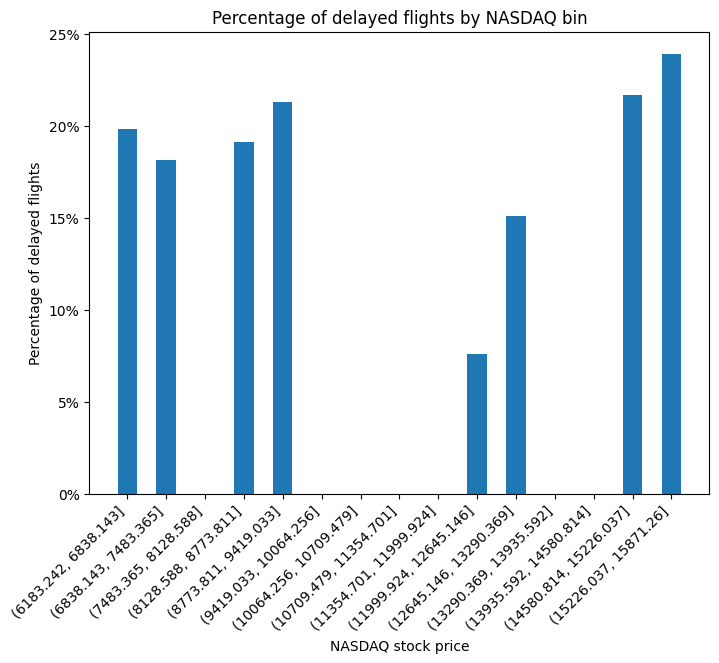

In [8]:

import pandas as pd
# Bin the distances into 15 equally-sized bins
df2['NASDAQ_BINNED'] = pd.cut(df2['NASDAQ'], bins=15)

# Calculate the percentage of delayed flights for each bin
grouped = df2.groupby('NASDAQ_BINNED')['ARR_DEL15'].mean().reset_index(name='percentage')

# Create a bar plot of the percentage of delayed flights against the distance bins
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(grouped['NASDAQ_BINNED'].astype(str), grouped['percentage']*100, width=0.5)
ax.set_xlabel('NASDAQ stock price')
ax.set_ylabel('Percentage of delayed flights')
ax.yaxis.set_major_formatter('{x:.0f}%')
ax.set_xticklabels(grouped['NASDAQ_BINNED'], rotation=45, ha='right')

ax.set_title('Percentage of delayed flights by NASDAQ bin')
plt.show()

C:\Users\brand\AppData\Local\Temp\ipykernel_19764\2179660668.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(grouped['NASDAQ_BINNED'], rotation=45, ha='right')


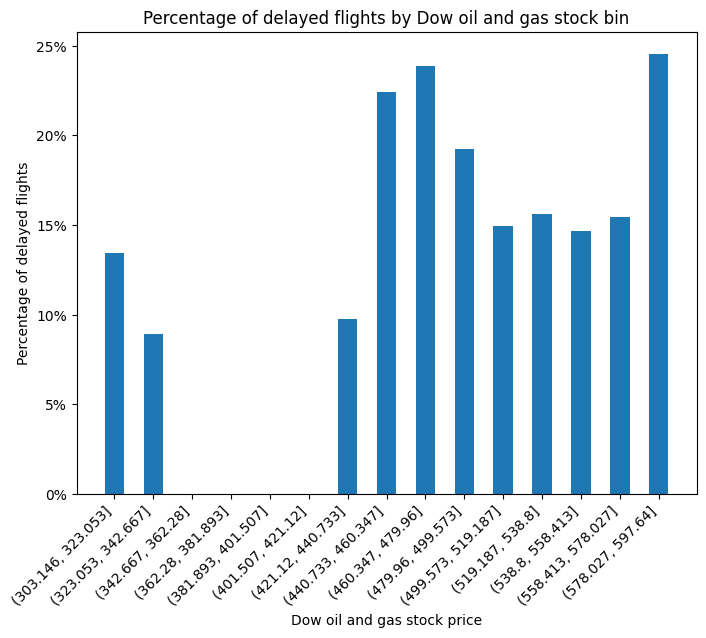

In [6]:

import pandas as pd
# Bin the distances into 15 equally-sized bins
df2['NASDAQ_BINNED'] = pd.cut(df2['DOW'], bins=15)

# Calculate the percentage of delayed flights for each bin
grouped = df2.groupby('NASDAQ_BINNED')['ARR_DEL15'].mean().reset_index(name='percentage')

# Create a bar plot of the percentage of delayed flights against the distance bins
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(grouped['NASDAQ_BINNED'].astype(str), grouped['percentage']*100, width=0.5)
ax.set_xlabel('Dow oil and gas stock price')
ax.set_ylabel('Percentage of delayed flights')
ax.yaxis.set_major_formatter('{x:.0f}%')
ax.set_xticklabels(grouped['NASDAQ_BINNED'], rotation=45, ha='right')

ax.set_title('Percentage of delayed flights by Dow oil and gas stock bin')
plt.show()

C:\Users\brand\AppData\Local\Temp\ipykernel_19764\2566193506.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(grouped['NASDAQ_BINNED'], rotation=45, ha='right')


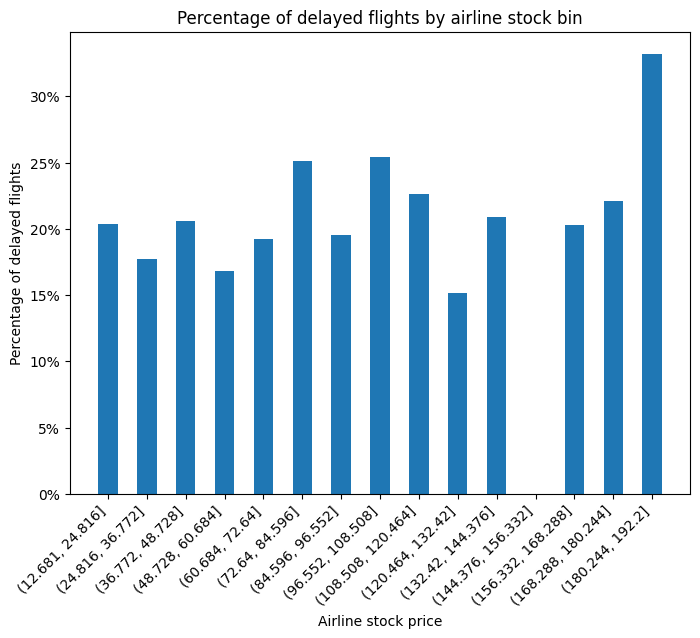

In [7]:

import pandas as pd
# Bin the distances into 15 equally-sized bins
df2['NASDAQ_BINNED'] = pd.cut(df2['AIR_STOCK'], bins=15)

# Calculate the percentage of delayed flights for each bin
grouped = df2.groupby('NASDAQ_BINNED')['ARR_DEL15'].mean().reset_index(name='percentage')

# Create a bar plot of the percentage of delayed flights against the distance bins
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(grouped['NASDAQ_BINNED'].astype(str), grouped['percentage']*100, width=0.5)
ax.set_xlabel('Airline stock price')
ax.set_ylabel('Percentage of delayed flights')
ax.yaxis.set_major_formatter('{x:.0f}%')
ax.set_xticklabels(grouped['NASDAQ_BINNED'], rotation=45, ha='right')

ax.set_title('Percentage of delayed flights by airline stock bin')
plt.show()